In [26]:
import pandas as pd

In [27]:
df=pd.read_csv('emails.csv')
df = df.reset_index()

In [29]:
df.shape

(5172, 3003)

In [30]:
df.head()

,level_0,Email No.,the,to,ect,and,for,of,a,you,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,Email 1,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Email 2,8,13,24,6,6,2,102,1,...,0,0,0,0,0,0,0,1,0,0
2,2,Email 3,0,0,1,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Email 4,0,5,22,0,5,1,51,2,...,0,0,0,0,0,0,0,0,0,0
4,4,Email 5,7,6,17,1,5,2,57,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
df.isnull()

,level_0,Email No.,the,to,ect,and,for,of,a,you,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df.isnull().sum()

level_0       0
Email No.     0
the           0
to            0
ect           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3003, dtype: int64

In [33]:
#input data
x=df.drop(['Email No.','Prediction'], axis=1)
#output data
y=df['Prediction']

In [34]:
x.shape

(5172, 3001)

In [35]:
x.dtypes

level_0           int64
the               int64
to                int64
ect               int64
and               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3001, dtype: object

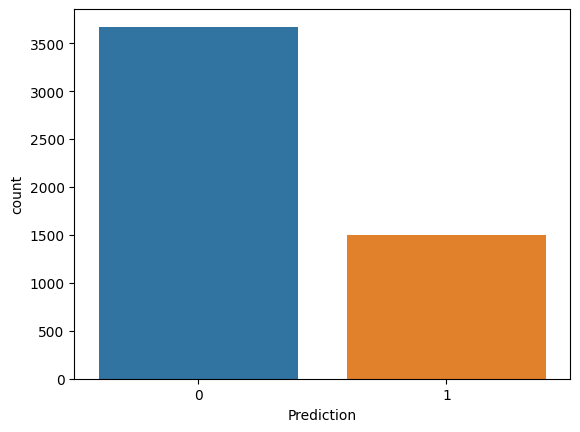

In [36]:
import seaborn as sns
sns.countplot(x=y);

In [37]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [38]:
 #Feature Scaling
 #MinMax Scaler shrinks the data within the given range, usually of 0 to 1.
 #It transforms data by scaling features to a given range.
 #It scales the values to a specific value range without changing the shape of the original distribution.
 from sklearn.preprocessing import MinMaxScaler
 scaler=MinMaxScaler()
 x_scaled=scaler.fit_transform(x)

In [39]:
x_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.93386192e-04, 3.80952381e-02, 9.84848485e-02, ...,
        0.00000000e+00, 8.77192982e-03, 0.00000000e+00],
       [3.86772384e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99613228e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99806614e-01, 9.52380952e-03, 5.30303030e-02, ...,
        0.00000000e+00, 8.77192982e-03, 0.00000000e+00],
       [1.00000000e+00, 1.04761905e-01, 1.81818182e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [40]:
#Cross-validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [41]:
x_scaled.shape

(5172, 3001)

In [42]:
x_train.shape

(3879, 3001)

In [43]:
x_test.shape

(1293, 3001)

In [44]:
#import the class KNN
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#Create the object
#while changing neighbour count, you can increase the accuracy score
knn=KNeighborsClassifier(n_neighbors=5)

In [46]:
#Train the algorithm
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
#Predict on test data
y_pred=knn.predict(x_test)

In [48]:
#Imprt the evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

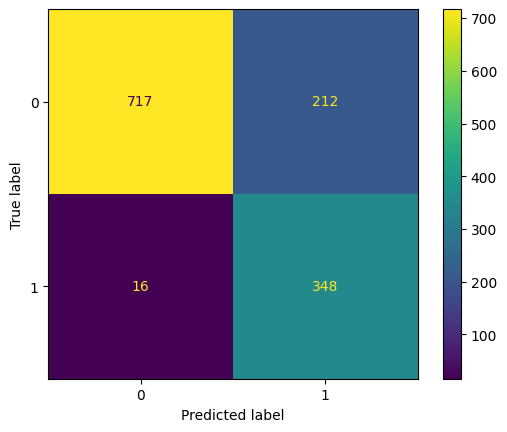

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [50]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [51]:
accuracy_score(y_test, y_pred)

0.8236658932714617

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       929
           1       0.62      0.96      0.75       364

    accuracy                           0.82      1293
   macro avg       0.80      0.86      0.81      1293
weighted avg       0.88      0.82      0.83      1293



In [53]:
#SVM

In [54]:
from sklearn.svm import SVC

In [55]:
#svm=SVC(kernel='linear')
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred)

0.9450889404485692

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       929
           1       0.97      0.83      0.89       364

    accuracy                           0.95      1293
   macro avg       0.95      0.91      0.93      1293
weighted avg       0.95      0.95      0.94      1293

